### Classifying Normal and Anomalous HTTP Requests Using Machine Learning

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd

file_path = 'combined_parsed_requests.csv'
df = pd.read_csv(file_path)

df.head()


,Method,Full URL,URL Path,Query Params,Query Params Length,Number of Query Params,Body Params,Content-Length,Content-Type,User-Agent,...,Accept-Encoding,Accept-Charset,Accept-Language,Pragma,Connection,Body Length,URL Length,Special Characters Count in URL,Special Characters Count in Query Params,request_type
0,GET,http://localhost:8080/tienda1/miembros/imagene...,/tienda1/miembros/imagenes/zarauz.jpg,NaN,0,0,NaN,NaN,NaN,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,58,4,0,normal
1,GET,http://localhost:8080/tienda1/imagenes/asf-log...,/tienda1/imagenes/asf-logo-wide.gif/,NaN,0,0,NaN,NaN,NaN,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,57,4,0,anomalous
2,GET,http://localhost:8080/tienda1/imagenes/1.gif,/tienda1/imagenes/1.gif,NaN,0,0,NaN,NaN,NaN,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,44,3,0,normal
3,GET,http://localhost:8080/tienda1/publico/autentic...,/tienda1/publico/autenticar.jsp,modo=entrar; login=darb2; pwdA=h4_Bi651A2; rem...,61,5,NaN,NaN,NaN,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,114,3,9,anomalous
4,POST,http://localhost:8080/tienda1/publico/pagar.jsp,/tienda1/publico/pagar.jsp,NaN,0,0,NaN,43.0,application/x-www-form-urlencoded,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,47,3,0,normal


In [11]:
import pandas as pd
from pycaret.clustering import setup, create_model, evaluate_model, assign_model, save_model, plot_model

In [14]:
from pycaret.classification import *

In [31]:
sample_data = df.sample(frac=0.3, random_state=42)

In [15]:

exp = setup(data=sample_data, target='request_type', session_id=42, normalize=True)

,Description,Value
0,Session id,42
1,Target,request_type
2,Target type,Binary
3,Target mapping,"anomalous: 0, normal: 1"
4,Original data shape,"(6106, 22)"
5,Transformed data shape,"(6106, 23)"
6,Transformed train set shape,"(4274, 23)"
7,Transformed test set shape,"(1832, 23)"
8,Numeric features,8
9,Categorical features,13


In [16]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8400,0.8631,0.8400,0.8515,0.8348,0.6573,0.6753,0.4520
et,Extra Trees Classifier,0.8313,0.9393,0.8313,0.8419,0.8258,0.6387,0.6562,0.1320
rf,Random Forest Classifier,0.8093,0.8958,0.8093,0.8282,0.8001,0.5867,0.6155,0.1140
ridge,Ridge Classifier,0.7864,0.8981,0.7864,0.8069,0.7877,0.5751,0.5884,0.0580
lda,Linear Discriminant Analysis,0.7864,0.8982,0.7864,0.8072,0.7877,0.5752,0.5888,0.0700
svm,SVM - Linear Kernel,0.7737,0.8655,0.7737,0.7848,0.7705,0.5308,0.5435,0.0600
lr,Logistic Regression,0.7714,0.8901,0.7714,0.7779,0.7726,0.5363,0.5393,0.5700
lightgbm,Light Gradient Boosting Machine,0.7454,0.8195,0.7454,0.7773,0.7236,0.4357,0.4855,0.6120
dt,Decision Tree Classifier,0.7445,0.7233,0.7445,0.7732,0.7235,0.4347,0.4810,0.0600
gbc,Gradient Boosting Classifier,0.7443,0.7727,0.7443,0.7608,0.7282,0.4404,0.4724,0.1230


In [17]:
knn_model = create_model('knn')

evaluate_model(knn_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8271,0.8430,0.8271,0.8349,0.8221,0.6306,0.6450
1,0.8435,0.8656,0.8435,0.8560,0.8382,0.6641,0.6834
2,0.8178,0.8428,0.8178,0.8248,0.8125,0.6107,0.6245
3,0.8271,0.8380,0.8271,0.8469,0.8191,0.6255,0.6543
4,0.8314,0.8548,0.8314,0.8436,0.8255,0.6383,0.6577
5,0.8665,0.8984,0.8665,0.8757,0.8631,0.7158,0.7298
6,0.8454,0.8606,0.8454,0.8591,0.8401,0.6684,0.6888
7,0.8478,0.8725,0.8478,0.8545,0.8441,0.6765,0.6883
8,0.8478,0.8857,0.8478,0.8568,0.8436,0.6754,0.6900


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
predictions = predict_model(knn_model)

print(predictions.head())


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8417,0.8597,0.8417,0.8539,0.8364,0.6607,0.6796


      Method                                           Full URL  \
1592     GET       http://localhost:8080/tienda1/imagenes/3.gif   
9793     GET  http://localhost:8080/tienda1/publico/caracter...   
54702    GET  http://localhost:8080/tienda1/publico/anadir.j...   
2055     GET       http://localhost:8080/tienda1/imagenes/3.gif   
46474   POST  http://localhost:8080/tienda1/publico/caracter...   

                                   URL Path  \
1592                /tienda1/imagenes/3.gif   
9793   /tienda1/publico/caracteristicas.jsp   
54702           /tienda1/publico/anadir.jsp   
2055                /tienda1/imagenes/3.gif   
46474  /tienda1/publico/caracteristicas.jsp   

                                            Query Params  Query Params Length  \
1592                                                 NaN                    0   
9793                                                id=2                    4   
54702  id=3; nombre=Queso Manchego; precio=39/; canti...               

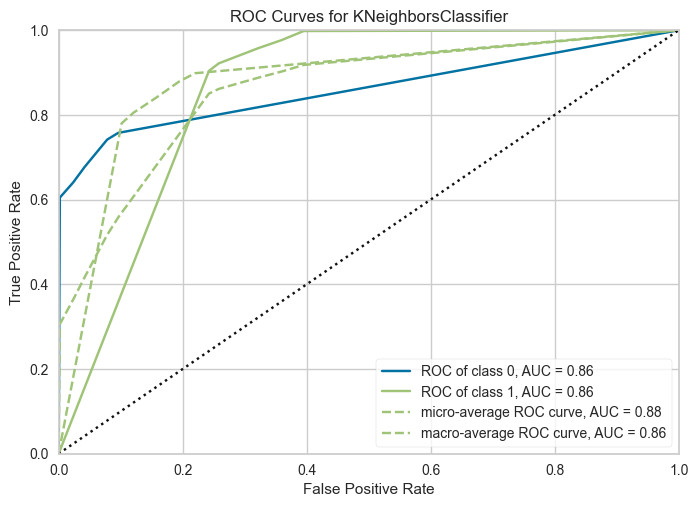

In [20]:
plot_model(knn_model, plot='auc')

#### Clustering Model

In [32]:
from pycaret.clustering import *

In [33]:
exp = setup(data=sample_data, session_id=42, normalize=True)

,Description,Value
0,Session id,42
1,Original data shape,"(18320, 22)"
2,Transformed data shape,"(18320, 9420)"
3,Numeric features,8
4,Categorical features,14
5,Rows with missing values,100.0%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [34]:
kmeans_model = create_model('kmeans', num_clusters=2)  

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5475,3.8959,0.3093,0,0,0


In [35]:
cluster_assignments = assign_model(kmeans_model)

print(cluster_assignments.head())


      Method                                           Full URL  \
28553    GET  http://localhost:8080/tienda1/miembros/imagene...   
1246    POST  http://localhost:8080/tienda1/publico/caracter...   
59943   POST  http://localhost:8080/tienda1/publico/registro...   
3698     GET  http://localhost:8080/tienda1/publico/autentic...   
41836   POST   http://localhost:8080/tienda1/publico/entrar.jsp   

                                                URL Path  \
28553  /tienda1/miembros/imagenes/ogono.jpg/asf-logo-...   
1246                /tienda1/publico/caracteristicas.jsp   
59943                      /tienda1/publico/registro.jsp   
3698                     /tienda1/publico/autenticar.jsp   
41836                        /tienda1/publico/entrar.jsp   

                                            Query Params  Query Params Length  \
28553                                                NaN                    0   
1246                                                 NaN                  

In [36]:
plot_model(kmeans_model, plot='cluster')

In [37]:
cluster_counts = cluster_assignments['Cluster'].value_counts()
print(cluster_counts)

Cluster
Cluster 0    18319
Cluster 1        1
Name: count, dtype: int64


In [38]:
anomaly_cluster = cluster_counts.idxmin()
anomalies = cluster_assignments[cluster_assignments['Cluster'] == anomaly_cluster]
print(anomalies)

      Method                                           Full URL  \
42522    GET  http://localhost:8080/tienda1/publico/anadir.j...   

                          URL Path  \
42522  /tienda1/publico/anadir.jsp   

                                            Query Params  Query Params Length  \
42522  id=1; nombre=Ques+o Manchego; precio=85; canti...                   74   

       Number of Query Params  Body Params  Content-Length Content-Type  \
42522                       5          NaN             NaN          NaN   

                                              User-Agent  ...  \
42522  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...  ...   

                    Accept-Charset Accept-Language    Pragma Connection  \
42522  utf-8, utf-8;q=0.5, *;q=0.5              en  no-cache      close   

      Body Length URL Length Special Characters Count in URL  \
42522           0        123                               3   

       Special Characters Count in Query Params  request_type  

#### Random Forest Classifier

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('combined_parsed_requests.csv')

# Fill any missing values (optional: customize this based on your data)
data.fillna('', inplace=True)

# Separate features (X) and target (y)
X = data.drop(columns=['request_type'])  # Features
y = data['request_type']  # Target

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-Hot Encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8957668058626054
              precision    recall  f1-score   support

   anomalous       0.87      0.88      0.88      5122
      normal       0.91      0.91      0.91      7091

    accuracy                           0.90     12213
   macro avg       0.89      0.89      0.89     12213
weighted avg       0.90      0.90      0.90     12213



#### Gradient Boosting using XGBoost

In [3]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 31.7 MB/s eta 0:00:04
   ---------------------------------------- 1.2/124.9 MB 12.6 MB/s eta 0:00:10
   - -------------------------------------- 3.2/124.9 MB 25.8 MB/s eta 0:00:05
   - -------------------------------------- 5.0/124.9 MB 29.1 MB/s eta 0:00:05
   -- ------------------------------------- 6.3/124.9 MB 28.9 MB/s eta 0:00:05
   -- ------------------------------------- 7.3/124.9 MB 27.3 MB/s eta 0:00:05
   -- ------------------------------------- 8.0/124.9 MB 25.7 MB/s eta 0:00:05
   -- ------------------------------------- 8.9/124.9 MB 24.7 MB/s eta 0:00:05
   --- ------------------------------------ 9.8/124.9 MB 24.1 MB/s eta 0:00:05
   --- ------------------------------------ 10.6/124.9 MB 23.4 MB/s eta 0:00:05
   --- ------------------------------------ 11.5/124.9 MB 25.2 MB/s eta 0:00:05
   --- ------------------------------------ 12.5/124.9 MB 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


First few rows of the dataset:
  Method                                           Full URL  \
0    GET  http://localhost:8080/tienda1/global/creditos.jsp   
1    GET  http://localhost:8080/tienda1/global/creditos.jsp   
2   POST    http://localhost:8080/tienda1/publico/pagar.jsp   
3   POST   http://localhost:8080/tienda1/publico/anadir.jsp   
4    GET  http://localhost:8080/tienda1/miembros/editar....   

                       URL Path  \
0  /tienda1/global/creditos.jsp   
1  /tienda1/global/creditos.jsp   
2    /tienda1/publico/pagar.jsp   
3   /tienda1/publico/anadir.jsp   
4  /tienda1/miembros/editar.jsp   

                                        Query Params  Query Params Length  \
0                                                NaN                    0   
1                                                NaN                    0   
2                                                NaN                    0   
3                                                NaN                   

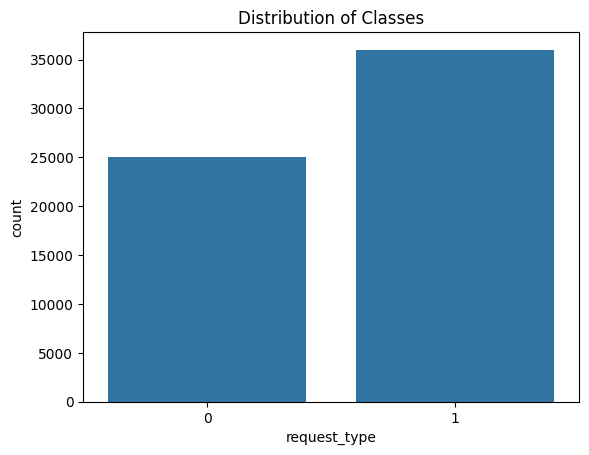

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      5062
           1       0.94      0.83      0.88      7151

    accuracy                           0.87     12213
   macro avg       0.87      0.88      0.87     12213
weighted avg       0.88      0.87      0.87     12213

Accuracy: 0.87


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('combined_parsed_requests.csv')

# Inspect the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())
print("\nStatistical summary:")
print(data.describe())
print("\nMissing values in each column:")
print(data.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='request_type', data=data)
plt.title('Distribution of Classes')
plt.show()

# Define features and target
X = data.drop(columns=['request_type'])  # Drop the target column
y = data['request_type']  # Target column

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Rename columns to avoid special characters
X.columns = X.columns.str.replace('[\[\]<>]', '', regex=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
# Assuming X is your features DataFrame and y is your target Series
# X, y = pd.read_csv('your_dataset.csv'), pd.read_csv('your_labels.csv')

# Check for missing values
print("Missing values before imputation:")
print(X.isnull().sum())

# Handle missing values using SimpleImputer
# Impute with mean for numerical features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Check for missing values after imputation
print("Missing values after imputation:")
print(pd.DataFrame(X_imputed).isnull().sum())

# Resample the dataset using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Missing values before imputation:
Query Params Length                                                                                                                                                                                                                                                                           0
Number of Query Params                                                                                                                                                                                                                                                                        0
Body Params                                                                                                                                                                                                                                                                               61065
Content-Length                                                                                        

c:\Users\sendt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Body Params']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Missing values after imputation:
0        0
1        0
2        0
3        0
4        0
        ..
26986    0
26987    0
26988    0
26989    0
26990    0
Length: 26991, dtype: int64


MemoryError: Unable to allocate 2.20 GiB for an array with shape (10935, 26991) and data type float64